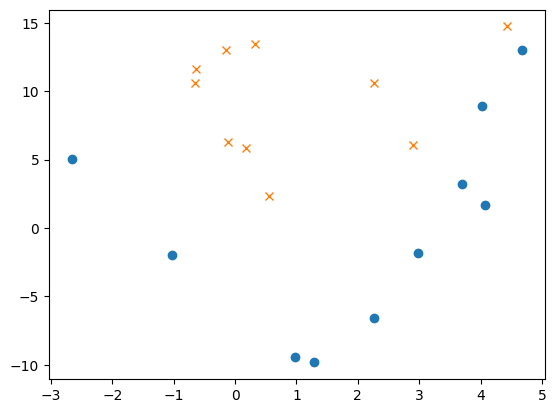

In [39]:
import numpy as np
import matplotlib.pyplot as plt

train=np.loadtxt('data3.csv',delimiter=',',skiprows=1)
train_x=train[:,0:2]
train_y=train[:,2]

plt.plot(train_x[train_y==1,0],train_x[train_y==1,1],'o')
plt.plot(train_x[train_y==0,0],train_x[train_y==0,1],'x')

plt.show()

In [40]:
theta=np.random.rand(4)

mu=train_x.mean(axis=0)
sigma=train_x.std(axis=0)

def standardize(x):
    return (x-mu)/sigma

train_z=standardize(train_x)

def to_matrix(x):
    x0=np.ones((x.shape[0],1))
    x3=x[:,0,np.newaxis]**2
    return np.hstack([x0,x,x3])

X=to_matrix(train_z)


In [41]:
def f(x):
    return 1/(1+np.exp(-np.dot(x,theta)))

ETA=1e-3

epoch=5000

for _ in range(epoch):
    theta=theta-ETA*np.dot(f(X)-train_y,X)

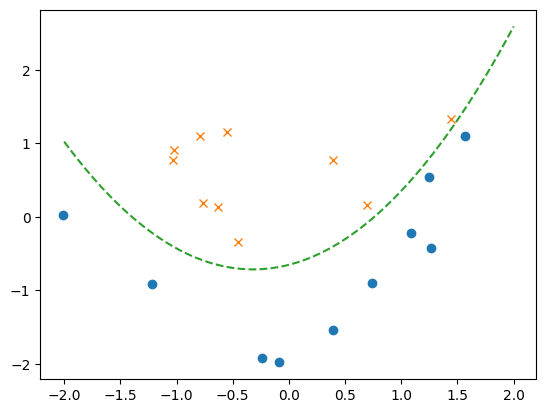

In [42]:
x1=np.linspace(-2,2,100)
x2=-(theta[0]+theta[1]*x1+theta[3]*x1**2)/theta[2]

plt.plot(train_z[train_y==1,0], train_z[train_y==1,1],'o')
plt.plot(train_z[train_y==0,0], train_z[train_y==0,1],'x')
plt.plot(x1,x2,linestyle='dashed')
plt.show()

In [43]:
def classify(x):
    return (f(x) >= 0.5).astype(int)

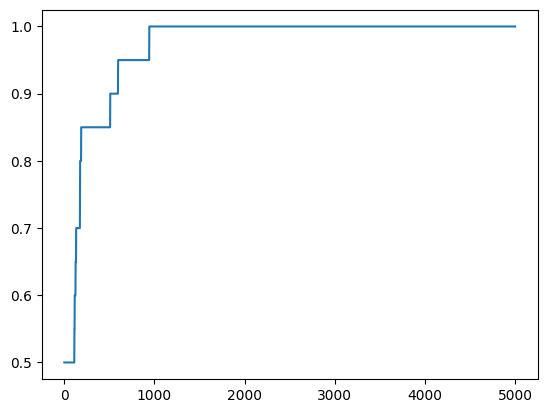

In [44]:
theta=np.random.rand(4)

accuracies=[]

for _ in range(epoch):
    theta=theta-ETA*np.dot(f(X)-train_y,X)
    result=classify(X)==train_y
    accuracy=len(result[result==True])/len(result)
    accuracies.append(accuracy)

x=np.arange(len(accuracies))

plt.plot(x,accuracies)
plt.show()

隨機梯度下降

In [45]:
theta=np.random.rand(4)

for _ in range(epoch):
    p=np.random.permutation(X.shape[0])
    for x, y in zip(X[p,:], train_y[p]):
        theta=theta-ETA*(f(x)-y)*x

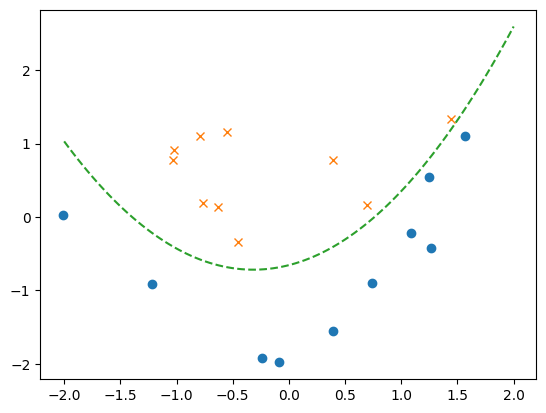

In [46]:
x1=np.linspace(-2,2,100)
x2=-(theta[0]+theta[1]*x1+theta[3]*x1**2)/theta[2]

plt.plot(train_z[train_y==1,0], train_z[train_y==1,1],'o')
plt.plot(train_z[train_y==0,0], train_z[train_y==0,1],'x')
plt.plot(x1,x2,linestyle='dashed')
plt.show()